In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [ ]:
mnist.feature_names

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# print(X[0:1])
some_digit = X[0:1]
some_digit_image = some_digit.reshape(28, 28)
# print(some_digit_image)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

print('Solution :' + y[0]) # string

In [9]:
import numpy as np
y = y.astype(np.uint8) # cast y to integers
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [11]:
knn_clf.predict(some_digit)

array([5], dtype=uint8)

In [12]:
print("accuracy KNN (test): {:2f}".format(knn_clf.score(X_test, y_test)))

accuracy KNN (test): 0.962700


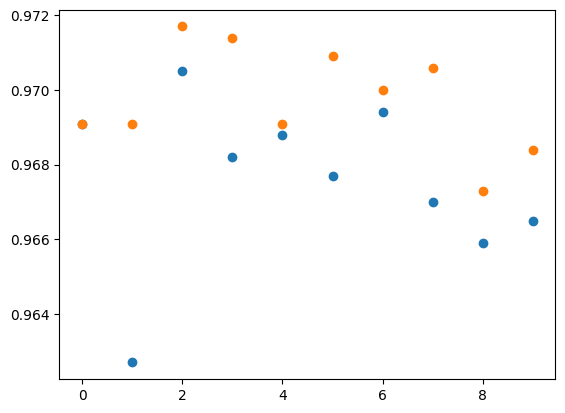

In [13]:
import matplotlib.pyplot as plt
import numpy as np

X_result = []
y_result_1 = []
y_result = []
for i in range(10):
  knn_clf = KNeighborsClassifier(n_neighbors=(i+1))
  knn_clf_1 = KNeighborsClassifier(n_neighbors=(i+1), weights='distance')
  knn_clf.fit(X_train, y_train)
  knn_clf_1.fit(X_train, y_train)
  X_result.append(i)
  y_result.append(knn_clf.score(X_test, y_test))
  y_result_1.append(knn_clf_1.score(X_test, y_test))

plt.scatter(np.array(X_result), np.array(y_result))
plt.scatter(np.array(X_result), np.array(y_result_1))
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.9621, 0.962 , 0.9645])

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5882,    6,    6,    1,    1,    5,   16,    2,    2,    2],
       [   1, 6699,   16,    1,    3,    1,    3,   12,    1,    5],
       [  59,   94, 5620,   23,    7,    9,   12,  104,   19,   11],
       [   8,   24,   41, 5880,    3,   60,    4,   43,   37,   31],
       [   7,   72,    1,    0, 5610,    0,   16,   11,    2,  123],
       [  20,   23,    4,   77,    8, 5182,   57,    5,   11,   34],
       [  28,   18,    2,    0,    5,   29, 5834,    0,    2,    0],
       [   4,   87,   15,    2,   19,    2,    0, 6066,    2,   68],
       [  23,  104,   20,   98,   39,  118,   31,   20, 5325,   73],
       [  18,   21,    4,   52,   53,   12,    3,   98,   14, 5674]])

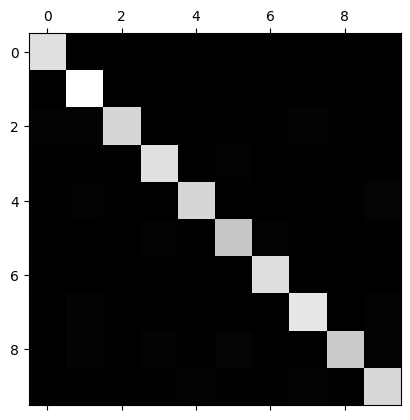

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [27]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))
print("Feature_names: \n{}".format(cancer.feature_names))
print("Shape of cancer data: {}".format(cancer.data.shape))
print("Sample counts per class: \n{}".format(
    {
        n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))
    }
))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Feature_names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Shape of cancer data: (569, 30)
Sample counts per class: 
{'malignant': 212, 'benign': 357}


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df_cancer['cancer'] = cancer.target
print(df_cancer)

In [ ]:
print(cancer.target)
print(cancer.target_names)

array([[<Axes: xlabel='mean radius', ylabel='mean radius'>,
        <Axes: xlabel='mean texture', ylabel='mean radius'>,
        <Axes: xlabel='mean perimeter', ylabel='mean radius'>,
        <Axes: xlabel='mean area', ylabel='mean radius'>],
       [<Axes: xlabel='mean radius', ylabel='mean texture'>,
        <Axes: xlabel='mean texture', ylabel='mean texture'>,
        <Axes: xlabel='mean perimeter', ylabel='mean texture'>,
        <Axes: xlabel='mean area', ylabel='mean texture'>],
       [<Axes: xlabel='mean radius', ylabel='mean perimeter'>,
        <Axes: xlabel='mean texture', ylabel='mean perimeter'>,
        <Axes: xlabel='mean perimeter', ylabel='mean perimeter'>,
        <Axes: xlabel='mean area', ylabel='mean perimeter'>],
       [<Axes: xlabel='mean radius', ylabel='mean area'>,
        <Axes: xlabel='mean texture', ylabel='mean area'>,
        <Axes: xlabel='mean perimeter', ylabel='mean area'>,
        <Axes: xlabel='mean area', ylabel='mean area'>]], dtype=object)

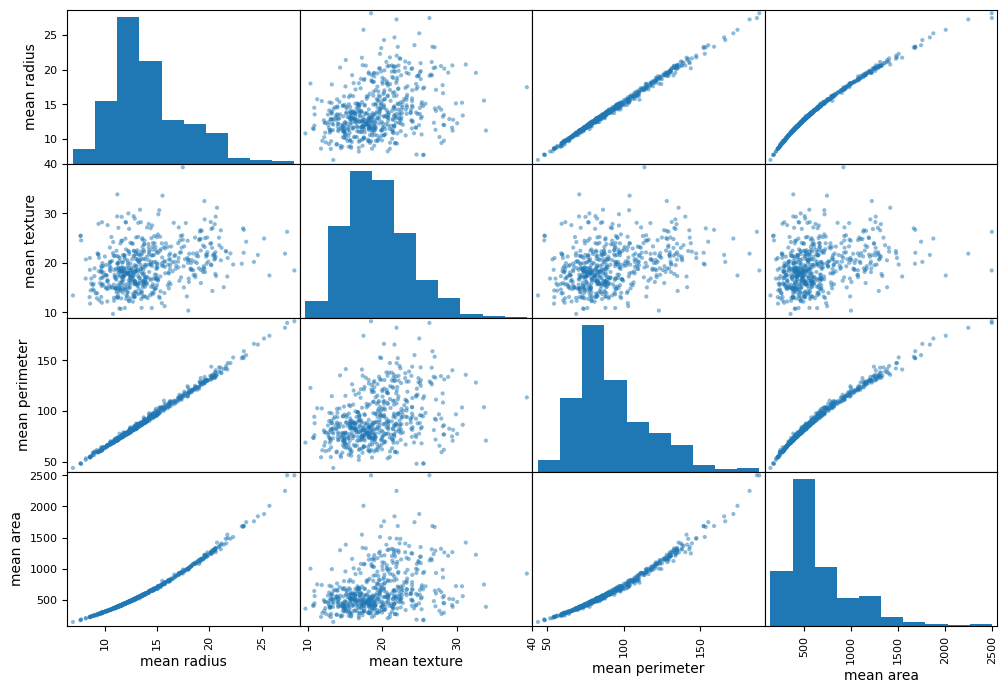

In [26]:
from pandas.plotting import scatter_matrix
attributes = ["mean radius", "mean texture", "mean perimeter", "mean area"]
scatter_matrix(df_cancer[attributes], figsize=(12, 8))

In [31]:
from sklearn.model_selection import train_test_split
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

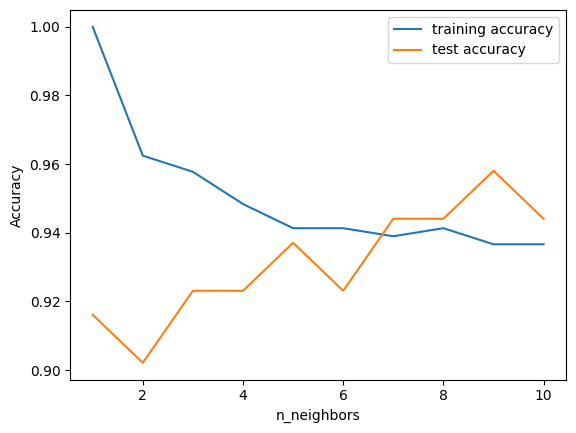

In [35]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)

  training_accuracy.append(clf.score(X_train, y_train))

  test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()